In [1]:
%pip install pandas
%pip install pyyaml
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import pandas as pd
import yaml
import numpy as np

# Initialize an empty DataFrame to store all the data:
wholedf = pd.DataFrame()

# Define paths in list:
path = r"data/2023-10", r"data/2024-11"


# Define the dates range:
path_date = pd.date_range("2023-10-03 05:30:00", "2024-11-22 05:30:00", freq='D').strftime('%Y-%m-%d_%H-%M-%S').tolist()
tickers_df = []
# Iterate over the paths:
for i in path:
    for j in path_date:
        # File path: yaml file name:
        file_path = f"{i}/{j}.yaml"
    
        # Check if the file exists before trying to read it:
        if os.path.exists(file_path):
            try:
                # Open the file and load its content
                with open(file_path, 'r') as file:
                    data = yaml.safe_load(file)  # Load the YAML file

                    # Check if the data is not empty
                    if data:
                        # Convert the loaded data to a DataFrame and concatenate it
                        df = pd.DataFrame(data)
                        wholedf = pd.concat([wholedf, df], ignore_index=True)
            except yaml.YAMLError as e:
                print(f"Error loading YAML file {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")

# Print the first 5 rows of the concatenated DataFrame:
print(wholedf.head())

# Save the concatenated DataFrame to a CSV file:
wholedf.to_csv(r"ProjectAIML_Stock/Combined_Data.csv", index=False)

# Ticker-wise data extraction:
tickers_df = pd.DataFrame(wholedf['Ticker'].unique(), columns=['Ticker'])

# Iterate over each unique ticker
for ticker in tickers_df['Ticker']:
    
    # Filter the DataFrame for the current ticker and save it to CSV
    wholedf[wholedf['Ticker'] == ticker].to_csv(f"ProjectAIML_Stock/{ticker}.csv", index=False)

# Volatility Analysis (Standard deviation of daily returns)

if 'close' in wholedf.columns:

    # Sort data by Ticker and Date (important for time series analysis)
    wholedf['date'] = pd.to_datetime(wholedf['date']) 

    wholedf = wholedf.sort_values(by=['Ticker', 'date'])
    
    # Calculate daily returns using the formula: (Close Price - Previous Close Price) / Previous Close Price
    wholedf['Daily_Return'] = (wholedf['close'] - wholedf['close'].shift(1)) / wholedf['close'].shift(1)

    # Calculate volatility as the standard deviation of daily returns for each ticker
    volatility = wholedf.groupby('Ticker')['Daily_Return'].std()

    # Dataframe with ticker and volatility
    volatility = pd.DataFrame(volatility).reset_index()
    volatility.columns = ['Ticker', 'Volatility']

    # Print the volatility DataFrame
    print(volatility)

    # Save volatility data to CSV
    volatility.to_csv(r"ProjectAIML_Stock/Volatility.csv", index=False)

# Top 10 Most Volatile Stocks

# Sort the volatility DataFrame in descending order and select top 10
top_10_volatility = volatility.sort_values(by='Volatility', ascending=False).head(10)
print(top_10_volatility)

# Save top 10 volatility data to CSV
top_10_volatility.to_csv(r"ProjectAIML_Stock/Top_10_Volatile_Stocks.csv", index=False)

File not found: data/2023-10/2023-10-07_05-30-00.yaml
File not found: data/2023-10/2023-10-08_05-30-00.yaml
File not found: data/2023-10/2023-10-14_05-30-00.yaml
File not found: data/2023-10/2023-10-15_05-30-00.yaml
File not found: data/2023-10/2023-10-21_05-30-00.yaml
File not found: data/2023-10/2023-10-22_05-30-00.yaml
File not found: data/2023-10/2023-10-24_05-30-00.yaml
File not found: data/2023-10/2023-10-28_05-30-00.yaml
File not found: data/2023-10/2023-10-29_05-30-00.yaml
File not found: data/2023-10/2023-11-01_05-30-00.yaml
File not found: data/2023-10/2023-11-02_05-30-00.yaml
File not found: data/2023-10/2023-11-03_05-30-00.yaml
File not found: data/2023-10/2023-11-04_05-30-00.yaml
File not found: data/2023-10/2023-11-05_05-30-00.yaml
File not found: data/2023-10/2023-11-06_05-30-00.yaml
File not found: data/2023-10/2023-11-07_05-30-00.yaml
File not found: data/2023-10/2023-11-08_05-30-00.yaml
File not found: data/2023-10/2023-11-09_05-30-00.yaml
File not found: data/2023-10

        Ticker  Volatility
44         TCS    4.048192
11   BRITANNIA    2.525544
7   BAJFINANCE    0.683228
2   APOLLOHOSP    0.604195
5   BAJAJ-AUTO    0.595725
20  HEROMOTOCO    0.587004
22  HINDUNILVR    0.477979
36    RELIANCE    0.419145
31      MARUTI    0.417393
9   BHARTIARTL    0.411574


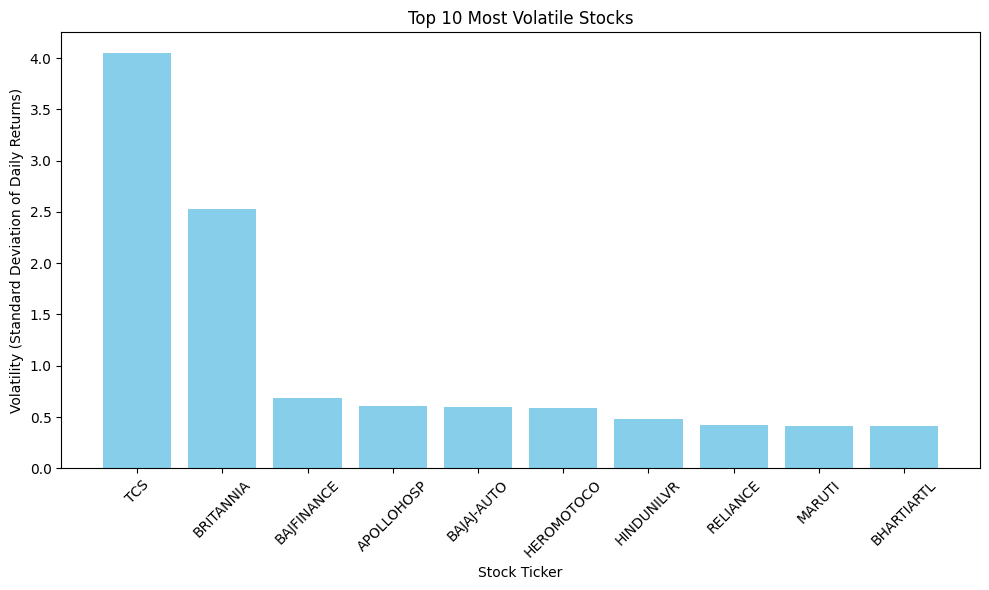

In [3]:
# Altered Top 10 Volatile stocks
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"ProjectAIML_Stock/Combined_Data.csv")

# Date range
start_date = '2023-10-01'
end_date = '2024-11-30'

if 'close' in df.columns:

    # Filter data by date range
    dfs = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    # Convert date column to datetime format
    dfs['date'] = pd.to_datetime(dfs['date'])
    
    # Sort the filtered dataframe by Ticker and Date
    dfs = dfs.sort_values(by=['Ticker', 'date'])
    
    # Calculate daily returns: (Close Price - Previous Close Price) / Previous Close Price
    dfs['Daily_Return'] = (dfs['close'] - dfs['close'].shift(1)) / dfs['close'].shift(1)

    # Calculate volatility (standard deviation of daily returns) for each ticker
    volatility = dfs.groupby('Ticker')['Daily_Return'].std()

    # Create a DataFrame with Ticker and its corresponding Volatility
    volatility_df = pd.DataFrame(volatility).reset_index()
    volatility_df.columns = ['Ticker', 'Volatility']

    # Sort the volatility in descending order and get the top 10 most volatile stocks
    top_10_volatility = volatility_df.sort_values(by='Volatility', ascending=False).head(10)

    # Print the top 10 most volatile stocks
    print(top_10_volatility)

    # Save the top 10 volatility data to a CSV file
    top_10_volatility.to_csv(r"ProjectAIML_Stock/Top_10_Vol_Stocks.csv", index=False)

    # Plot a bar chart to visualize the volatility of the top 10 most volatile stocks
    plt.figure(figsize=(10,6))
    plt.bar(top_10_volatility['Ticker'], top_10_volatility['Volatility'], color='skyblue')
    plt.title('Top 10 Most Volatile Stocks')
    plt.xlabel('Stock Ticker')
    plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("Price column not found in the dataset. Please check the column name for price.")

In [4]:
# Cumulative Return Over Time:

import pandas as pd


# Convert 'date' column to datetime
wholedf['date'] = pd.to_datetime(wholedf['date'])
print(wholedf['date'])

# Filter data for the specified period: from October 2023 to October 2024
start_date = pd.to_datetime("2023-10-01")
end_date = pd.to_datetime("2024-11-30")

data = wholedf[(wholedf['date'] >= start_date) & (wholedf['date'] <= end_date)]

# Extract stock prices on the two key dates (Oct 2023 and Oct 2024)
# First, filter the data for October 2023 and October 2024
october_2023_data = data[data['date'].dt.month == 10][data['date'].dt.year == 2023]
november_2024_data = data[data['date'].dt.month == 11][data['date'].dt.year == 2024]

# Get the prices for each stock (ticker) on both dates (October 2023 and October 2024)
oct_2023_prices = october_2023_data.groupby('Ticker')[['open', 'close', 'high', 'low']].first()  # First entry in October 2023
nov_2024_prices = november_2024_data.groupby('Ticker')[['open', 'close', 'high', 'low']].last()  # Last entry in October 2024

# Merge the two DataFrames to get both prices for each stock
price_comparison = pd.DataFrame({
    'Oct_2023_Price_Open': oct_2023_prices['open'],
    'Oct_2023_Price_Close': oct_2023_prices['close'],
    'Oct_2023_Price_High': oct_2023_prices['high'],
    'Oct_2023_Price_Low': oct_2023_prices['low'],
    'Nov_2024_Price_Open': nov_2024_prices['open'],
    'Nov_2024_Price_Close': nov_2024_prices['close'],
    'Nov_2024_Price_High': nov_2024_prices['high'],
    'Nov_2024_Price_Low': nov_2024_prices['low']
})

# Calculate the Cumulative_return for each stock over the period
price_comparison['cumulative_return'] = (price_comparison['Nov_2024_Price_Close'] - price_comparison['Oct_2023_Price_Close'])/price_comparison['Oct_2023_Price_Close'] * 100

# Reset index to move 'Ticker' from the index to a column(The Ticker was part of the index after the groupby(), so I added price_comparison.reset_index(inplace=True) to move it back to a column.)
price_comparison.reset_index(inplace=True)

# Keep only the 'Ticker' and 'cumulative_return' columns
price_comparison = price_comparison[['Ticker', 'cumulative_return']]

# Print the price comparison DataFrame
print(price_comparison)

# Save the price comparison data to CSV
price_comparison.to_csv("ProjectAIML_Stock/CumulativeReturn.csv", index=False)

                    # Cumulative Return for Top 5 Performing Stocks:
# Sort the cumulative return DataFrame in descending order and select top 5
top_5_performing_stocks = price_comparison.sort_values(by='cumulative_return', ascending=False).head(5)
print(top_5_performing_stocks)
# Save top 5 performing stocks data to CSV
top_5_performing_stocks.to_csv("ProjectAIML_Stock/Top_5_Performing_Stocks.csv", index=False)



24     2023-10-03 05:30:00
74     2023-10-04 05:30:00
124    2023-10-05 05:30:00
174    2023-10-06 05:30:00
224    2023-10-09 05:30:00
               ...        
1466   2024-11-14 05:30:00
1516   2024-11-18 05:30:00
1566   2024-11-19 05:30:00
1616   2024-11-21 05:30:00
1666   2024-11-22 05:30:00
Name: date, Length: 1700, dtype: datetime64[ns]
        Ticker  cumulative_return
0     ADANIENT          -6.670856
1   ADANIPORTS          36.727207
2   APOLLOHOSP          35.478956
3   ASIANPAINT         -21.935046
4     AXISBANK           9.735363
5   BAJAJ-AUTO          89.011153
6   BAJAJFINSV           2.549566
7   BAJFINANCE         -16.110874
8          BEL         101.760057
9   BHARTIARTL          69.599049
10        BPCL          67.477150
11   BRITANNIA           7.850160
12       CIPLA          25.676361
13   COALINDIA          41.846523
14     DRREDDY          11.178754
15   EICHERMOT          48.779614
16      GRASIM          35.781988
17     HCLTECH          53.257447
18    HDF

C:\Users\aravi\AppData\Local\Temp\ipykernel_38612\3859283950.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  october_2023_data = data[data['date'].dt.month == 10][data['date'].dt.year == 2023]
C:\Users\aravi\AppData\Local\Temp\ipykernel_38612\3859283950.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  november_2024_data = data[data['date'].dt.month == 11][data['date'].dt.year == 2024]


In [5]:

# Read the stock data (assuming combined_data contains 'Date', 'Ticker', and 'Close' columns)
combined_data = pd.read_csv(r"ProjectAIML_Stock/Combined_Data.csv")

# Ensure the Date column is in datetime format, including the time
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Filter the data between 3-October-2023 and 22-November-2024
start_date = pd.to_datetime('2023-10-03 05:30:00')
end_date = pd.to_datetime('2024-11-22 05:30:00')

# Filter the dataset for the desired date range
filtered_data = combined_data[(combined_data['date'] >= start_date) & (combined_data['date'] <= end_date)]

# Set Date as the index
filtered_data.set_index('date', inplace=True)

# Pivot the data to get stock prices for each ticker by date
stock_data = filtered_data.pivot(columns='Ticker', values='close')

# Calculate monthly returns (percentage change) by resampling and removing time from the Date
monthly_returns = stock_data.resample('ME').ffill().pct_change() * 100

# Drop columns or rows with all NaN values to clean the data
monthly_returns_cleaned = monthly_returns.dropna(how='all', axis=1)  # Drop columns where all values are NaN
monthly_returns_cleaned = monthly_returns_cleaned.dropna(how='all', axis=0)  # Drop rows where all values are NaN

# Calculate the cumulative returns for each stock over the entire period
cumulative_returns = (1 + monthly_returns_cleaned / 100).cumprod() - 1

# Get the final cumulative returns (last row for each stock)
final_returns = cumulative_returns.iloc[-1]

# Replace NaN values with 0 for stocks that didn't have any data
final_returns = final_returns.fillna(0)

# Sort the cumulative returns to get top gainers and losers
top_gainers = final_returns.sort_values(ascending=False).head(10)  # Top 10 gainers
top_losers = final_returns.sort_values(ascending=True).head(10)  # Top 10 losers

# Create DataFrame with "Ticker" and "Top Gainers"/"Top Losers"
top_gainers_df = pd.DataFrame({'Ticker': top_gainers.index, 'Top Gainers': top_gainers.values})
top_losers_df = pd.DataFrame({'Ticker': top_losers.index, 'Top Losers': top_losers.values})

# Display the results
print("Top 10 Gainers:")
print(top_gainers_df)

print("\nTop 10 Losers:")
print(top_losers_df)

# Save the results to CSV files
top_gainers_df.to_csv(r"ProjectAIML_Stock/Top_Gainers.csv", index=False)
top_losers_df.to_csv(r"ProjectAIML_Stock/Top_Losers.csv", index=False)

Top 10 Gainers:
       Ticker  Top Gainers
0       TRENT     2.138483
1         BEL     1.128458
2         M&M     1.011584
3  BAJAJ-AUTO     0.785991
4  BHARTIARTL     0.694251
5   POWERGRID     0.677620
6        BPCL     0.648025
7   SUNPHARMA     0.609846
8        NTPC     0.557758
9       TECHM     0.550670

Top 10 Losers:
       Ticker  Top Losers
0  INDUSINDBK   -0.313787
1  ASIANPAINT   -0.166796
2  BAJFINANCE   -0.109169
3   NESTLEIND   -0.070276
4    ADANIENT   -0.030925
5  HINDUNILVR   -0.013575
6  BAJAJFINSV    0.025463
7   KOTAKBANK    0.025590
8       TITAN    0.061689
9      MARUTI    0.064043


Top 5 Performing Stocks Based on Cumulative Return:
Ticker
TCS           27.368421
BRITANNIA     24.347878
MARUTI         6.124846
BHARTIARTL     5.862289
APOLLOHOSP     5.141956
Name: Cumulative_Return, dtype: float64


C:\Users\aravi\AppData\Local\Temp\ipykernel_38612\3419879736.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['date'] = pd.to_datetime(dfs['date'])


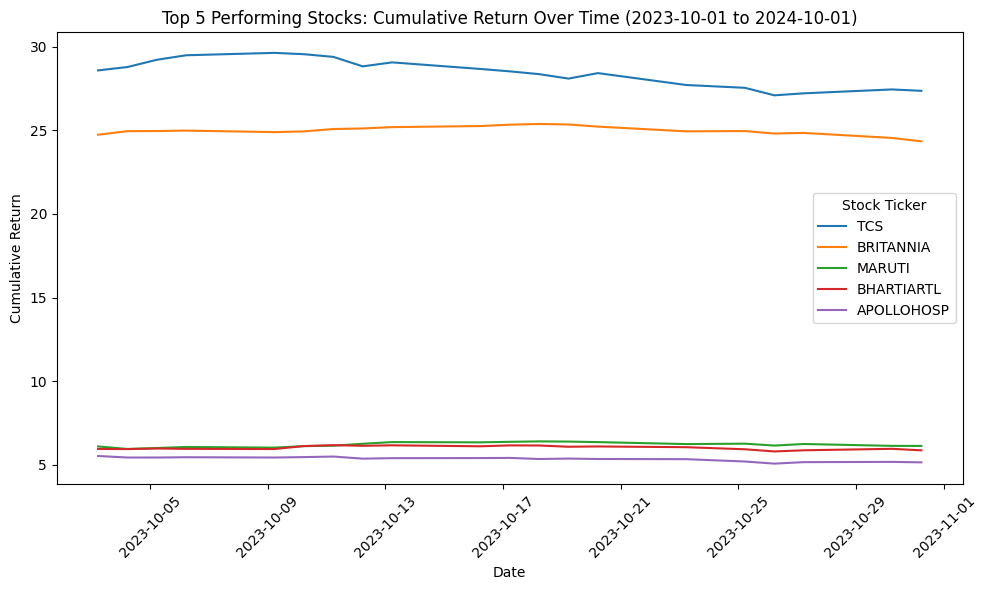

In [6]:
df = pd.read_csv(r"ProjectAIML_Stock/Combined_Data.csv")

# Date range for filtering the data
start_date = '2023-10-01'
end_date = '2024-10-01'

if 'close' in df.columns:

    # Filter the data by the date range
    dfs = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    # Convert the date column to datetime format
    dfs['date'] = pd.to_datetime(dfs['date'])
    
    # Sort the dataframe by Ticker and Date
    dfs = dfs.sort_values(by=['Ticker', 'date'])
    
    # Calculate daily returns: (Close Price - Previous Close Price) / Previous Close Price
    dfs['Daily_Return'] = (dfs['close'] - dfs['close'].shift(1)) / dfs['close'].shift(1)
    
    # Calculate cumulative return for each ticker by applying a running total of daily returns
    dfs['Cumulative_Return'] = (1 + dfs['Daily_Return']).groupby(dfs['Ticker']).cumprod() - 1

    # Get the cumulative return for each stock at the end of the period (final cumulative return)
    cumulative_returns = dfs.groupby('Ticker')['Cumulative_Return'].last()

    # Identify the top 5 performing stocks based on final cumulative return
    Top_5_stocks = cumulative_returns.sort_values(ascending=False).head(5)
     
    # Print the top 5 performing stocks
    print("Top 5 Performing Stocks Based on Cumulative Return:")
    print(Top_5_stocks)

    # Save it to csv file
    Top_5_stocks.to_csv('ProjectAIML_Stock/Top_5_stocks.csv')

    # Plot the cumulative return over time for the top 5 performing stocks
    plt.figure(figsize=(10, 6))

    # Loop through each of the top 5 stocks
    for ticker in Top_5_stocks.index:
        stock_data = dfs[dfs['Ticker'] == ticker]
        plt.plot(stock_data['date'], stock_data['Cumulative_Return'], label=ticker)

    # Title and labels
    plt.title('Top 5 Performing Stocks: Cumulative Return Over Time (2023-10-01 to 2024-10-01)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend(title='Stock Ticker')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("Price column not found in the dataset. Please check the column name for price.")

In [7]:

#Sector-wise performance analysis

# Read the sector data and combined stock data
sector_data = pd.read_csv(r"data/Sector_data - Sheet1.csv")
combined_data = pd.read_csv(r"ProjectAIML_Stock/Combined_Data.csv")

# Clean up ticker symbols in sector data (strip spaces and extract the symbol after the colon)
sector_data['Symbol'] = sector_data['Symbol'].str.strip().str.upper()
sector_data['Symbol'] = sector_data['Symbol'].str.extract(r':\s*([A-Za-z0-9\-]+)')[0]

# Clean ticker symbols in combined data
combined_data['Ticker'] = combined_data['Ticker'].str.strip().str.upper()

# Ensure 'date' column in combined_data is in datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'], errors='coerce')

# Check if there are any invalid dates and handle them
if combined_data['date'].isnull().any():
    print("Warning: There are invalid or missing dates in the 'Date' column.")

# Define the start and end date for the period (2023-10-01 to 2024-11-30)
start_date = pd.to_datetime('2023-10-01')
end_date = pd.to_datetime('2024-11-30')

# Filter data between the start and end dates
recent_data = combined_data[(combined_data['date'] >= start_date) & (combined_data['date'] <= end_date)]

# Sort by Ticker and Date, and drop duplicates to retain the first and last prices
recent_data_sorted = recent_data.sort_values(by=['Ticker', 'date'])
recent_data_first_last = recent_data_sorted.groupby('Ticker').agg(
    first_price=('close', 'first'),
    last_price=('close', 'last')
).reset_index()

# Calculate the 1-year return for each ticker
recent_data_first_last['1_year_return'] = (recent_data_first_last['last_price'] - recent_data_first_last['first_price']) / recent_data_first_last['first_price'] * 100

# Merge with sector data to get the sector information
sector_performance = pd.merge(recent_data_first_last, sector_data[['Symbol', 'sector']], left_on='Ticker', right_on='Symbol', how='left')

# Group by sector and calculate the average 1-year return for each sector
sector_performance_grouped = sector_performance.groupby('sector').agg(
    avg_1_year_return=('1_year_return', 'mean'),
    count_tickers=('Ticker', 'count')
).reset_index()

# Sort sectors by the average 1-year return
sector_performance_grouped_sorted = sector_performance_grouped.sort_values(by='avg_1_year_return', ascending=False)

# Display the final result
print(sector_performance_grouped_sorted)

sector_performance_grouped_sorted.rename(columns={"____sector": "sector"}, inplace=True)

# Save the sector-wise performance data to CSV withoout count_tickers column
sector_performance_grouped_sorted = sector_performance_grouped_sorted.drop(columns=['count_tickers'])
sector_performance_grouped_sorted.to_csv(r"ProjectAIML_Stock/SectorWisePerformance.csv", index=False)


             sector  avg_1_year_return  count_tickers
16        RETAILING         113.305399              2
4           DEFENCE         101.760057              1
15            POWER          60.184095              2
1       AUTOMOBILES          46.236450              5
11           MINING          41.846523              1
17         SOFTWARE          38.275954              5
3            CEMENT          36.970945              1
5            ENERGY          36.564788              3
12    MISCELLANEOUS          36.103081              2
0         ALUMINIUM          35.868320              1
19         TEXTILES          35.781988              1
14  PHARMACEUTICALS          31.379173              3
18            STEEL          19.217125              2
6       ENGINEERING          17.253722              1
10        INSURANCE          11.767832              2
7           FINANCE          11.576063              3
2           BANKING          11.380534              6
9    FOOD & TOBACCO         

In [8]:
# Stock Price Correlation Analysis
# Read the data (assuming combined_data contains the necessary stock data with 'Date' and 'Close' columns)
combined_data = pd.read_csv(r"ProjectAIML_Stock/Combined_Data.csv")

# Ensure 'Date' is in datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Pivot the data to get stock prices for each ticker on a particular date
stock_data = combined_data.pivot(index='date', columns='Ticker', values='close')

# Calculate daily percentage change for each stock
daily_pct_change = stock_data.pct_change()

# Calculate the correlation matrix of the daily percentage changes
correlation_matrix = daily_pct_change.corr()

# Display the correlation matrix
print(correlation_matrix)

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv(r"ProjectAIML_Stock/Correlation_Matrix.csv")


Ticker      ADANIENT  ADANIPORTS  APOLLOHOSP  ASIANPAINT  AXISBANK  \
Ticker                                                               
ADANIENT    1.000000    0.867756    0.742577    0.104211  0.698400   
ADANIPORTS  0.867756    1.000000    0.957238   -0.055889  0.904008   
APOLLOHOSP  0.742577    0.957238    1.000000   -0.048363  0.907262   
ASIANPAINT  0.104211   -0.055889   -0.048363    1.000000 -0.170512   
AXISBANK    0.698400    0.904008    0.907262   -0.170512  1.000000   
BAJAJ-AUTO  0.776733    0.976664    0.973548   -0.091158  0.933333   
BAJAJFINSV  0.719409    0.820543    0.811474    0.112540  0.784771   
BAJFINANCE -0.310360   -0.555302   -0.563418    0.435134 -0.508582   
BEL         0.786881    0.984100    0.978764   -0.096289  0.922583   
BHARTIARTL  0.778070    0.980570    0.979225   -0.084968  0.915082   
BPCL        0.790878    0.981527    0.974649   -0.092784  0.917246   
BRITANNIA   0.772636    0.945332    0.946596    0.084418  0.862078   
CIPLA       0.762073

In [9]:
#Correlation Matrix
# Try reading the data with error handling
try:
    combined_data = pd.read_csv(r"ProjectAIML_Stock/Combined_Data.csv")
except FileNotFoundError:
    print("Error: The file 'Combined_Data.csv' was not found.")
    # Handle the error, e.g., exit the script or load a different file
    exit()

# Ensure 'Date' is in datetime format
try:
    combined_data['date'] = pd.to_datetime(combined_data['date'])
except KeyError:
    print("Error: 'date' column not found in the data.")
    exit()

# Sanitize ticker symbols by replacing non-alphanumeric characters
try:
    combined_data['Ticker'] = combined_data['Ticker'].apply(lambda x: x.replace('-', '_').replace(' ', '_').replace("'", "''"))
except KeyError:
    print("Error: 'Ticker' column not found in the data.")
    exit()

# Pivot the data to get stock prices for each ticker on a particular date
try:
    stock_data = combined_data.pivot(index='date', columns='Ticker', values='close')
except KeyError:
    print("Error: 'close' or 'Ticker' column missing in the data.")
    exit()

# Calculate daily percentage change for each stock
daily_pct_change = stock_data.pct_change()

# Calculate the correlation matrix of the daily percentage changes
correlation_matrix = daily_pct_change.corr()

# Display the correlation matrix
print("Correlation Matrix of Daily Percentage Changes:")
print(correlation_matrix)

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv(r"ProjectAIML_Stock/Correlation_Matrix.csv")


Correlation Matrix of Daily Percentage Changes:
Ticker      ADANIENT  ADANIPORTS  APOLLOHOSP  ASIANPAINT  AXISBANK  \
Ticker                                                               
ADANIENT    1.000000    0.867756    0.742577    0.104211  0.698400   
ADANIPORTS  0.867756    1.000000    0.957238   -0.055889  0.904008   
APOLLOHOSP  0.742577    0.957238    1.000000   -0.048363  0.907262   
ASIANPAINT  0.104211   -0.055889   -0.048363    1.000000 -0.170512   
AXISBANK    0.698400    0.904008    0.907262   -0.170512  1.000000   
BAJAJFINSV  0.719409    0.820543    0.811474    0.112540  0.784771   
BAJAJ_AUTO  0.776733    0.976664    0.973548   -0.091158  0.933333   
BAJFINANCE -0.310360   -0.555302   -0.563418    0.435134 -0.508582   
BEL         0.786881    0.984100    0.978764   -0.096289  0.922583   
BHARTIARTL  0.778070    0.980570    0.979225   -0.084968  0.915082   
BPCL        0.790878    0.981527    0.974649   -0.092784  0.917246   
BRITANNIA   0.772636    0.945332    0.9465

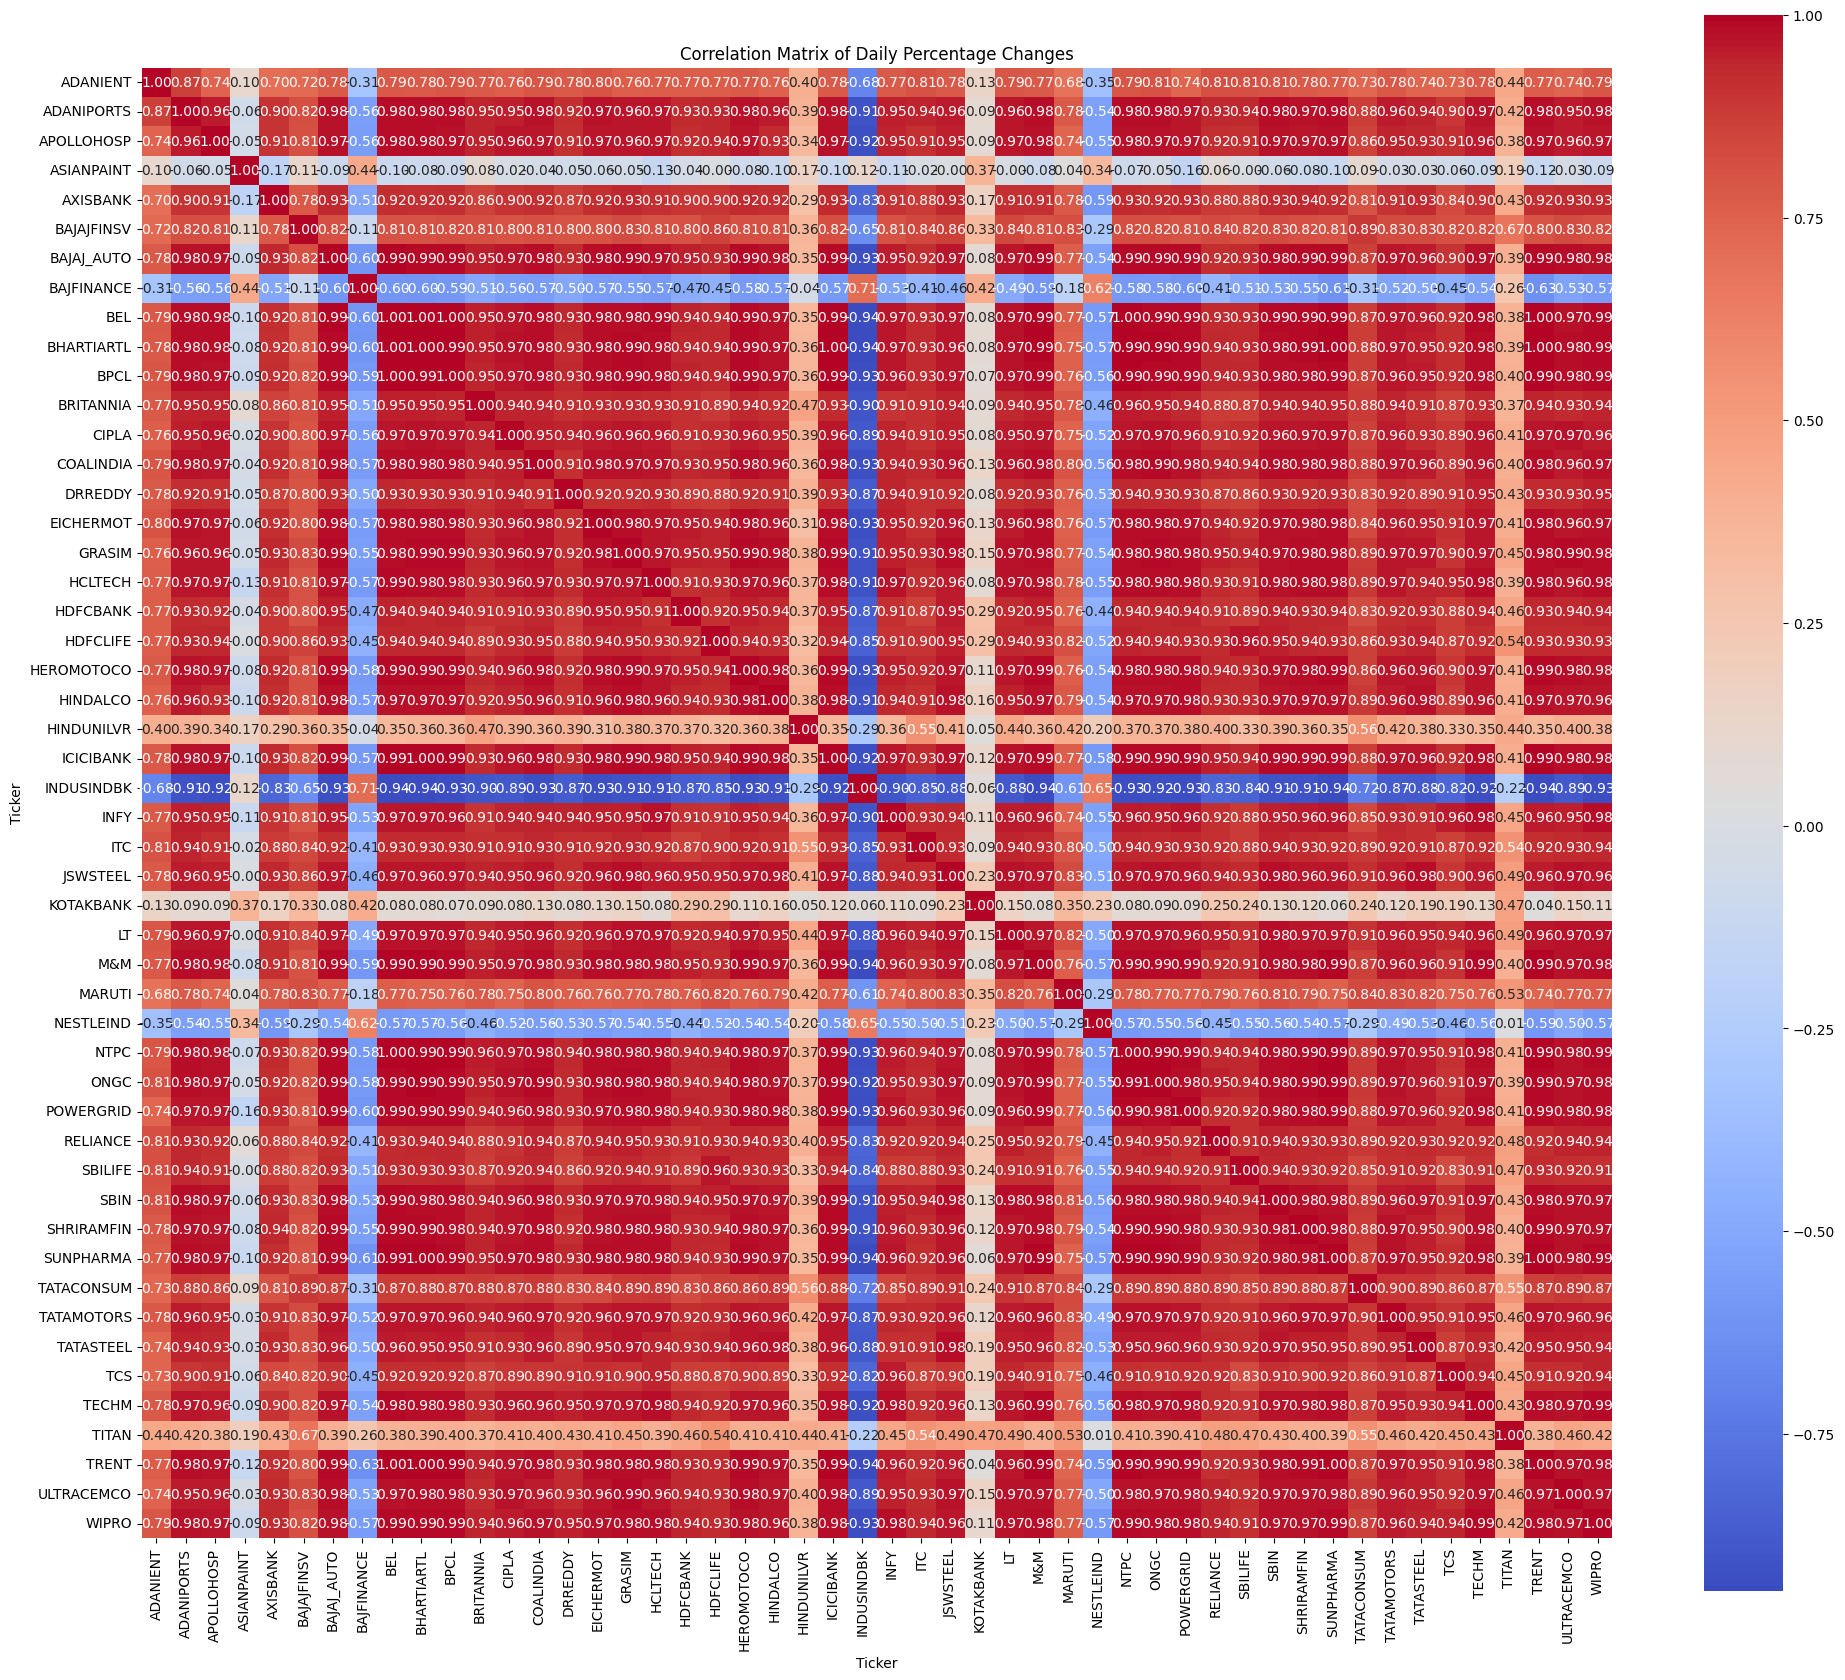

In [10]:
# Heatmap Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(20,20))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Daily Percentage Changes")
plt.tight_layout()
plt.show()

In [11]:
# Top Gainers and Losers Analysis Month wise
# Read the stock data (assuming combined_data contains 'Date', 'Ticker', and 'Close' columns)
combined_data = pd.read_csv(r"ProjectAIML_Stock/Combined_Data.csv")

# Ensure the Date column is in datetime format, including the time
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Filter the data between 3-October-2023 and 22-November-2024
start_date = pd.to_datetime('2023-10-03 05:30:00')
end_date = pd.to_datetime('2024-11-22 05:30:00')

# Filter the dataset for the desired date range
filtered_data = combined_data[(combined_data['date'] >= start_date) & (combined_data['date'] <= end_date)]

# Set Date as the index
filtered_data.set_index('date', inplace=True)

# Pivot the data to get stock prices for each ticker by date
stock_data = filtered_data.pivot(columns='Ticker', values='close')

# Calculate monthly returns (percentage change) by resampling and removing time from the Date
monthly_returns = stock_data.resample('ME').ffill().pct_change() * 100

# Drop columns or rows with all NaN values to clean the data
monthly_returns_cleaned = monthly_returns.dropna(how='all', axis=1)  # Drop columns where all values are NaN
monthly_returns_cleaned = monthly_returns_cleaned.dropna(how='all', axis=0)  # Drop rows where all values are NaN

# Loop through each month to calculate the top gainers and losers
for month, month_data in monthly_returns_cleaned.iterrows():
    # Calculate the cumulative returns for each stock over the current month
    monthly_final_returns = (1 + month_data / 100).cumprod() - 1
    
    # Replace NaN values with 0 for stocks that didn't have any data in that month
    monthly_final_returns = monthly_final_returns.fillna(0)

    # Sort the cumulative returns to get top gainers and losers for the current month
    top_gainers = monthly_final_returns.sort_values(ascending=False).head(10)  # Top 10 gainers
    top_losers = monthly_final_returns.sort_values(ascending=True).head(10)  # Top 10 losers

    # Create DataFrame with "Ticker", "Top Gainers"/"Top Losers", and the respective month
    top_gainers_df = pd.DataFrame({'Ticker': top_gainers.index, 'Top Gainers': top_gainers.values})
    top_losers_df = pd.DataFrame({'Ticker': top_losers.index, 'Top Losers': top_losers.values})

    # Add the month to the DataFrames
    top_gainers_df['Month'] = month.strftime('%B %Y')
    top_losers_df['Month'] = month.strftime('%B %Y')

    # Display the results for this month
    print(f"Top 10 Gainers for {month.strftime('%B %Y')}:")
    print(top_gainers_df)

    print(f"\nTop 10 Losers for {month.strftime('%B %Y')}:")
    print(top_losers_df)

    # Save the results to CSV files for the current month
    top_gainers_df.to_csv(r"ProjectAIML_Stock/Topstocks\Top_Gainers_{month.strftime('%B_%Y')}.csv", index=False)
    top_losers_df.to_csv(r"ProjectAIML_Stock/Bottomstocks\Top_Losers_{month.strftime('%B_%Y')}.csv", index=False)


Top 10 Gainers for November 2023:
       Ticker  Top Gainers          Month
0  HINDUNILVR     0.012177  November 2023
1    HDFCLIFE     0.010984  November 2023
2         BEL     0.010192  November 2023
3    HINDALCO     0.010098  November 2023
4  ULTRACEMCO     0.009999  November 2023
5       WIPRO     0.009470  November 2023
6       TRENT     0.007523  November 2023
7     DRREDDY     0.004822  November 2023
8        BPCL     0.004053  November 2023
9  HEROMOTOCO     0.003833  November 2023

Top 10 Losers for November 2023:
       Ticker  Top Losers          Month
0    RELIANCE   -0.039376  November 2023
1   SUNPHARMA   -0.038557  November 2023
2         TCS   -0.036908  November 2023
3        ONGC   -0.035291  November 2023
4   TATASTEEL   -0.034106  November 2023
5       TECHM   -0.031567  November 2023
6  TATACONSUM   -0.031084  November 2023
7  TATAMOTORS   -0.030853  November 2023
8      MARUTI   -0.029072  November 2023
9   POWERGRID   -0.029047  November 2023


OSError: Cannot save file into a non-existent directory: 'ProjectAIML_Stock\Topstocks'

In [12]:

# Load the combined stock data (ensure 'date', 'Ticker', 'close' columns exist)
combined_data = pd.read_csv(r"ProjectAIML_Stock/Combined_Data.csv")

# Convert 'date' to datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Filter the data between specific dates (adjust as needed)
start_date = pd.to_datetime('2023-10-03 05:30:00')
end_date = pd.to_datetime('2024-11-22 05:30:00')
filtered_data = combined_data[(combined_data['date'] >= start_date) & (combined_data['date'] <= end_date)]

# Set date as index for resampling
filtered_data.set_index('date', inplace=True)

# Pivot: each Ticker becomes a column, rows are dates with closing prices
stock_data = filtered_data.pivot(columns='Ticker', values='close')

# Resample monthly (month-end), forward fill missing data, then compute % change
monthly_returns = stock_data.resample('M').ffill().pct_change() * 100

# Drop rows/columns with all NaNs
monthly_returns_cleaned = monthly_returns.dropna(how='all', axis=1).dropna(how='all', axis=0)

# Store monthly gainers and losers
all_months_data = []

for month, month_data in monthly_returns_cleaned.iterrows():
    # Replace NaNs with 0
    month_data = month_data.fillna(0)

    # Get Top 5 Gainers
    top_gainers = month_data.sort_values(ascending=False).head(5)
    top_gainers_df = pd.DataFrame({
        'Ticker': top_gainers.index,
        'monthly_return': top_gainers.values,
        'Month': month.strftime('%B %Y'),
        'Type': 'Gainer'
    })

    # Get Top 5 Losers
    top_losers = month_data.sort_values(ascending=True).head(5)
    top_losers_df = pd.DataFrame({
        'Ticker': top_losers.index,
        'monthly_return': top_losers.values,
        'Month': month.strftime('%B %Y'),
        'Type': 'Loser'
    })

    # Append both to final list
    all_months_data.extend([top_gainers_df, top_losers_df])

# Combine everything into one DataFrame
final_df = pd.concat(all_months_data, ignore_index=True)

# Save to CSV
output_path = r"ProjectAIML_Stock/Top_Gainers_Losers_Monthwise.csv"
final_df.to_csv(output_path, index=False)

print(f"Monthly Top 5 Gainers and Losers saved to: {output_path}")


Monthly Top 5 Gainers and Losers saved to: ProjectAIML_Stock/Top_Gainers_Losers_Monthwise.csv


C:\Users\aravi\AppData\Local\Temp\ipykernel_38612\1383168241.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = stock_data.resample('M').ffill().pct_change() * 100


In [ ]:

# Top 10 Green and Red Stocks Analysis
# Assume `combined_data` contains 'Date', 'Ticker', 'Close', and 'Volume' columns
combined_data = pd.read_csv(r"ProjectAIML_Stock/Combined_Data.csv")

# Ensure the Date column is in datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Set Date as the index
combined_data.set_index('date', inplace=True)

# Pivot the data to get stock prices for each ticker by date
stock_data = combined_data.pivot(columns='Ticker', values='close')

# Calculate the yearly returns for each stock (using resampling)
yearly_returns = stock_data.resample('YE').ffill().pct_change() * 100

# Drop rows with NaN values for cleaner data
yearly_returns_cleaned = yearly_returns.dropna(how='all')

# Sort the yearly returns to get the top 10 gainers (green stocks) and top 10 losers (red stocks)
top_10_green_stocks = yearly_returns_cleaned.iloc[-1].sort_values(ascending=False).head(10)
top_10_red_stocks = yearly_returns_cleaned.iloc[-1].sort_values(ascending=True).head(10)

# Create DataFrames for Top 10 Green and Top 10 Red Stocks
top_10_green_df = pd.DataFrame({'Ticker': top_10_green_stocks.index, 'Yearly Return Percentage': top_10_green_stocks.values})
top_10_red_df = pd.DataFrame({'Ticker': top_10_red_stocks.index, 'Yearly Return Percentage': top_10_red_stocks.values})

# Market Summary Calculations
# 1. Number of Green vs. Red Stocks (Green = Positive Yearly Return, Red = Negative Yearly Return)
green_stocks_count = len(top_10_green_stocks)
red_stocks_count = len(top_10_red_stocks)

# 2. Average price across all stocks (mean of final closing prices)
average_price = stock_data.iloc[-1].mean()

# 3. Average Volume across all stocks (assuming 'Volume' column exists in combined_data)
volume_data = combined_data.pivot(columns='Ticker', values='volume')  # Pivot to get Volume data
average_volume = volume_data.iloc[-1].mean()

# Display the results
print("Top 10 Green Stocks (Gainers):")
print(top_10_green_df)

print("\nTop 10 Red Stocks (Losers):")
print(top_10_red_df)

print("\nMarket Summary:")
print(f"Number of Green Stocks: {green_stocks_count}")
print(f"Number of Red Stocks: {red_stocks_count}")
print(f"Average Price Across All Stocks: {average_price:.2f}")
print(f"Average Volume Across All Stocks: {average_volume:.2f}")

# Save the results to CSV files
top_10_green_df.to_csv(r"ProjectAIML_Stock/Top_10_Green_Stocks.csv", index=False)
top_10_red_df.to_csv(r"ProjectAIML_Stock/Top_10_Red_Stocks.csv", index=False)


Top 10 Green Stocks (Gainers):
       Ticker  Yearly Return Percentage
0       TRENT                117.771158
1         M&M                 74.219382
2         BEL                 52.470141
3  BHARTIARTL                 52.034489
4   SUNPHARMA                 42.546350
5   POWERGRID                 42.053120
6  BAJAJ-AUTO                 39.492442
7  SHRIRAMFIN                 38.803390
8       TECHM                 37.307979
9     HCLTECH                 29.486392

Top 10 Red Stocks (Losers):
       Ticker  Yearly Return Percentage
0  INDUSINDBK                -37.571531
1  ASIANPAINT                -27.339525
2    ADANIENT                -21.795749
3   NESTLEIND                -15.452422
4  TATACONSUM                -11.948279
5       TITAN                 -9.978370
6   BRITANNIA                 -9.180567
7  BAJFINANCE                 -8.785780
8  HINDUNILVR                 -8.209614
9   KOTAKBANK                 -7.685656

Market Summary:
Number of Green Stocks: 10
Number of Red St

In [ ]:
df = pd.read_csv(r"ProjectAIML_Stock/Combined_Data.csv")
#display(df)

# Finding yearly return to find top 10 green and red stocks 
df['yearly_return'] = (df['close'] - df['open']) / df['open']

# Top 10 Green Stocks
top_10_green_stocks = df.sort_values(by='yearly_return', ascending=False).head(10)
print("Top 10 Green Stocks:", top_10_green_stocks)

# Top 10 Loss Stocks
top_10_loss_stocks = df.sort_values(by='yearly_return', ascending=True).head(10)
print("\nTop 10 Loss Stocks:", top_10_loss_stocks )

# Merge the two dataframes to get the final result
# Create a new dataframe with the top 10 green and red stocks
Top10_gain_loss = pd.merge(top_10_green_stocks, top_10_loss_stocks)
# Print the final result
print("\nFinal Result:")

# Save the final result to a csv file
Top10_gain_loss.to_csv(r"ProjectAIML_Stock/TopGainNLoss_Data.csv", index=False)

# Market Summary
# Calculate the overall number of green vs. red stocks
green_stocks = len(df[df['yearly_return'] > 0])
red_stocks = len(df[df['yearly_return'] <= 0])

# Calculate the average price across all stocks
average_price = df['close'].mean()

# Calculate the average volume across all stocks
average_volume = df['volume'].mean()

print("\nMarket Summary:")
print(f"Number of Green Stocks: {green_stocks}")
print(f"Number of Red Stocks: {red_stocks}")
print(f"Average Price Across All Stocks: {average_price:.2f}")
print(f"Average Volume Across All Stocks: {average_volume:.2f}")


Top 10 Green Stocks:            Ticker    close                 date     high      low    month  \
4363        TRENT  3607.50  2024-02-07 05:30:00  3634.70  2955.00  2024-02   
2174     ADANIENT  2959.35  2023-12-05 05:30:00  2999.90  2531.20  2023-12   
2175   ADANIPORTS  1013.10  2023-12-05 05:30:00  1024.30   880.00  2023-12   
8395     HINDALCO   695.25  2024-06-05 05:30:00   700.65   607.00  2024-06   
10613       TRENT  6275.35  2024-08-09 05:30:00  6373.85  5626.60  2024-08   
1213        TRENT  2424.00  2023-11-07 05:30:00  2450.00  2181.70  2023-11   
10138  SHRIRAMFIN  2925.00  2024-07-26 05:30:00  3044.00  2690.00  2024-07   
4242         BPCL   279.18  2024-02-02 05:30:00   286.20   258.00  2024-02   
7924     ADANIENT  3387.30  2024-05-23 05:30:00  3406.00  3135.55  2024-05   
8381   INDUSINDBK  1500.95  2024-06-05 05:30:00  1515.80  1372.35  2024-06   

          open    volume  yearly_return  
4363   3080.00   5846891       0.171266  
2174   2531.20  22879079       0.169

In [ ]:

# Load the CSV data
df = pd.read_csv(r"ProjectAIML_Stock/Combined_Data.csv")

# Check the columns to confirm the necessary ones exist
# print(df.columns)  # Uncomment for debugging

# Calculate the yearly return: (close - open) / open
df['yearly_return'] = (df['close'] - df['open']) / df['open']

# Top 10 Green Stocks (where yearly_return > 0)
top_10_green_stocks = df[df['yearly_return'] > 0].sort_values(by='yearly_return', ascending=False).head(10)

# Top 10 Loss (Red) Stocks (where yearly_return <= 0)
top_10_loss_stocks = df[df['yearly_return'] <= 0].sort_values(by='yearly_return', ascending=True).head(10)

# Print top green and red stocks for debugging (Optional)
print("Top 10 Green Stocks:")
print(top_10_green_stocks[['Ticker', 'yearly_return', 'close', 'open']])

print("\nTop 10 Loss Stocks:")
print(top_10_loss_stocks[['Ticker', 'yearly_return', 'close', 'open']])

# Combine the two lists into a dictionary or separate list for visualization/analysis
top_10_gain_loss = {
    'Top 10 Green Stocks': top_10_green_stocks[['Ticker', 'yearly_return', 'close', 'open']],
    'Top 10 Loss Stocks': top_10_loss_stocks[['Ticker', 'yearly_return', 'close', 'open']]
}

# Print the result to confirm the data
print("\nFinal Result (Top 10 Green and Red Stocks):")
print(top_10_gain_loss)

# Optionally save the result to a CSV (or combine into one DataFrame and save)
top_10_combined = pd.concat([top_10_green_stocks[['Ticker', 'yearly_return', 'close', 'open']],
                              top_10_loss_stocks[['Ticker', 'yearly_return', 'close', 'open']]])

# Save the combined result to a CSV
top_10_combined.to_csv(r"ProjectAIML_Stock/TopGainNLoss_Data.csv", index=False)

# Market Summary
# Calculate the overall number of green vs. red stocks
green_stocks = len(df[df['yearly_return'] > 0])
red_stocks = len(df[df['yearly_return'] <= 0])

# Calculate the average price across all stocks
average_price = df['close'].mean()

# Calculate the average volume across all stocks
average_volume = df['volume'].mean()

# Print the market summary
print("\nMarket Summary:")
print(f"Number of Green Stocks: {green_stocks}")
print(f"Number of Red Stocks: {red_stocks}")
print(f"Average Price Across All Stocks: {average_price:.2f}")
print(f"Average Volume Across All Stocks: {average_volume:.2f}")

# Combine No of Green and Red Stocks , Average Price and Average Volume into dataframe and save to csv file
market_summary = pd.DataFrame({'No of Green Stocks': [green_stocks],'No of Red Stocks': [red_stocks],'average_price': [average_price],'average_volume': [average_volume]})
market_summary.to_csv(r"ProjectAIML_Stock/MarketSummary.csv", index=False)

Top 10 Green Stocks:
          Ticker  yearly_return    close     open
1674    ADANIENT       0.060447  2228.00  2101.00
1675  ADANIPORTS       0.059808  1136.75  1072.60
415   TATAMOTORS       0.052291   667.10   633.95
279    COALINDIA       0.052038   303.25   288.25
1311   POWERGRID       0.051826   329.80   313.55
1176         BEL       0.049913   301.85   287.50
177   BAJAJFINSV       0.048289  1634.65  1559.35
1109    JSWSTEEL       0.046706   999.50   954.90
888   SHRIRAMFIN       0.045489  1935.20  1851.00
863        TRENT       0.044778  2122.10  2031.15

Top 10 Loss Stocks:
          Ticker  yearly_return    close     open
1624    ADANIENT      -0.140075  2183.65  2539.35
1393   BRITANNIA      -0.072408  5027.55  5420.00
1213       TRENT      -0.070510  6505.50  6999.00
1343   BRITANNIA      -0.063258  5434.65  5801.65
1096  HEROMOTOCO      -0.062691  4806.05  5127.50
1245    HINDALCO      -0.049707   648.10   682.00
1504         TCS      -0.045929  4019.50  4213.00
1625  AD